# Сеть с радиальными базисными функциями

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.arange(-20, 20, 0.25)
Y = 0.5 * X + 2 * X**2 - X**3

In [2]:
def Gaussian(x, c, s):
    g = np.zeros(c.shape[0]) 
    for i in range(c.shape[0]):
        g[i] = np.exp(-(x - c[i])**2 / s**2) # np.linalg.norm(x - centres[i], ord=2) # числитель при векторе x, а не точке
    return g
def Plot(X, Y, pred):
    plt.plot(X, Y, label='Реальность') 
    plt.plot(X, pred, color='red', label='Предсказанные значения')
    plt.legend()
    plt.show()

In [3]:
def Predict(X, w, s):
    c = np.linspace(np.min(X), np.max(X), w.shape[0]) #инициализация центров рбф
    neurons = np.array([Gaussian(x, c, s) for x in X]) #отображение от входа к скрытому нелинейно - гауссиан
    return np.dot(neurons, w) #а дальше по классике: веса на нейроны
def Learning(X, Y, l, s, num_neurons):
    centres = np.linspace(np.min(X), np.max(X), num_neurons)
    w = np.random.rand(centres.shape[0])
    for epoch in range(100):
        for i in range(X.shape[0]):
            g = Gaussian(X[i], centres, s)
            out = np.dot(g, w)
            error = Y[i] - out
            w += l * error * g
    return w

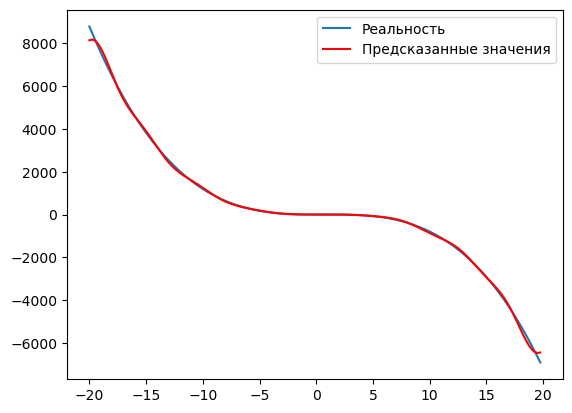

In [4]:
l = 0.1
sigma = 2.9 #ширина колокола (гауссовской функции)
num_neurons = 10 #кол-во нейронов
w = Learning(X, Y, l, sigma, num_neurons)
pred = Predict(X, w, sigma)
Plot(X, Y, pred)

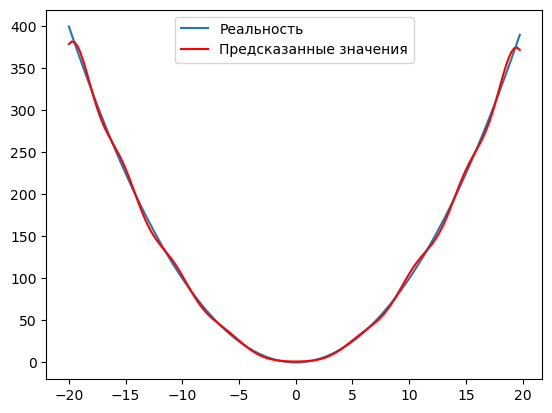

In [5]:
yy = X**2
w = Learning(X, yy, l, sigma, num_neurons)
p = Predict(X, w, sigma)
Plot(X, yy, p)

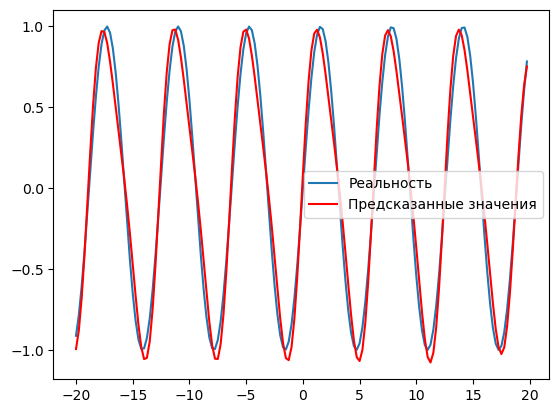

In [6]:
sy = np.sin(X)
w = Learning(X, sy, l, 1.5, 20)
ps = Predict(X, w, 1.5)
Plot(X, sy, ps)

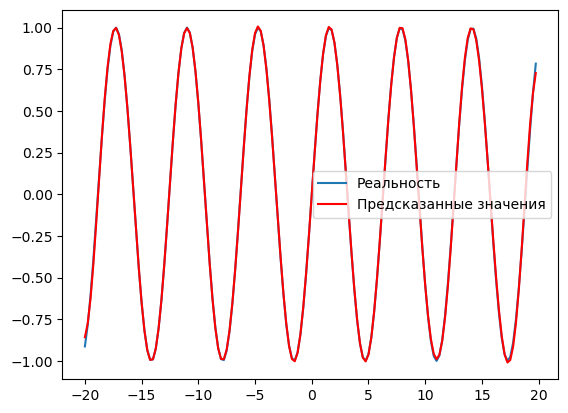

In [7]:
sy = np.sin(X)
w = Learning(X, sy, l, 1.5, 40)
ps = Predict(X, w, 1.5)
Plot(X, sy, ps)